### **Second Notebook - Task 2 Feature Selection**.

### Feature Selection and Classification Analysis on the DOROTHEA Dataset  

This notebook presents an analysis of the DOROTHEA dataset, originally used in the NIPS 2003 feature selection challenge. The dataset contains binary features describing the three-dimensional properties of molecules in compounds. The primary objective is to classify compounds based on their ability to bind to a target site on thrombin, which is critical in drug discovery.  

#### Objectives  

The notebook is structured into the following tasks:  

1. **Data Exploration (T2.1):**  
   - Generate summary statistics and visualizations to understand the data distribution and its relevance to the classification task.  

2. **Feature Selection Methods (T2.2):**  
   - Train and evaluate three feature selection approaches covered in the course to achieve high balanced accuracy using a minimal number of features.  

3. **Additional Feature Selection Methods (T2.3):**  
   - Implement and assess up to three alternative feature selection methods, including methods not covered in the course, with a focus on balanced accuracy and feature minimization.  



#### ***Import the libraries***

To begin, we need to import all the necessary libraries required to complete our task efficiently.


In [1]:
# Import all the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest 
import os
import sklearn.linear_model as skl
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import ElasticNet#from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve, average_precision_score
from prettytable import PrettyTable



#### ***Importation of the data***
We will use the dataset provided on Moodle as a compressed
CSV file: data2.csv.gz

In [ ]:


# Importe our data
data = pd.read_csv('data2.csv.gz')


### **PART T2.1**. - Exploratory Data Analysis

To begin our analysis, we provide a summary of the dataset, including its dimensions, key statistics, and the presence of any missing values, to better understand its structure and quality.

In [4]:
# Summary of our data
shape = data.shape
info = data.info()
describe = data.describe()
missing_values= data.isnull().sum().sum()


print("The number od rows and columns is : ", shape)
print("The summary of our data is : \n : ")
display(describe)
print("Missing values in total in the dataset : ", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 100001 entries, label to 99999
dtypes: int64(100001)
memory usage: 610.4 MB
The number od rows and columns is :  (800, 100001)
The summary of our data is : 
 : 


,label,0,1,2,3,4,5,6,7,8,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
count,800.000000,800.000000,800.0,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.0,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-0.805000,0.012500,0.0,0.001250,0.0,0.020000,0.003750,0.017500,0.001250,0.006250,...,0.013750,0.007500,0.0,0.001250,0.0,0.006250,0.007500,0.012500,0.006250,0.035000
std,0.593646,0.111172,0.0,0.035355,0.0,0.140088,0.061161,0.131207,0.035355,0.078859,...,0.116524,0.086331,0.0,0.035355,0.0,0.078859,0.086331,0.111172,0.078859,0.183895
min,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


Missing values in total in the dataset :  0


- The dataset consists of 800 rows and 100,001 columns, with no missing values. 
- The summary statistics provide insights into the distribution of features.

Next, we'll investigate the class distribution to address the potential imbalance in the data.

In [5]:
# Summary of our unbalanced data
print(data.iloc[:, 0].value_counts()) # Number of active and inactive compounds in our dataset
sparcity = (data == 0).mean().mean()  # Calculate sparsity
print(f" The sparsity of the data is : {sparcity:.2f}")


label
-1    722
 1     78
Name: count, dtype: int64
 The sparsity of the data is : 0.99


Our dataset shows a significant class imbalance, with 722 instances labeled as -1 and only 78 instances labeled as 1. Additionally, the data has a high sparsity of 0.99, indicating that a large proportion of the feature values are zero.

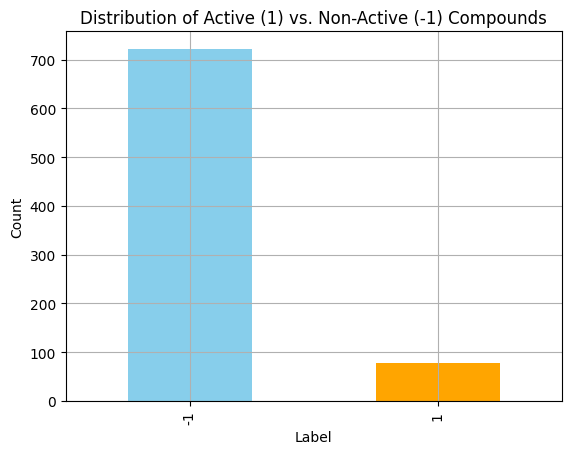

In [6]:
# Plot the inactive compounds against the active compounds 
data['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribution of Active (1) vs. Non-Active (-1) Compounds")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(True)
plt.show()

- The above plot shows that the data is imbalanced and it may needs to either be oversampled to handle the imbalance to prevent bias toward the majority class, or to assess the model using balanced accuracy score.

### Data Preprocessing: 

- First, the data is split into target class labels (Y) the features (X). We have created another dataframe, data_new, which removes all features with a variance less than 0.01. This will optimize the computing time for methods that are more computationally expensive.

- Next, the data is split into training and testing sets, assigning 20% of the data to the test set, the random seed is fixed to 42.

- Additionally, we create a balanced version of the dataset using the SMOTE (Synthetic Minority Over-sampling Technique) algorithm. SMOTE adds synthetic data for the minority class (label 1 - the active compounds). This balanced dataset will be used for training some of our methods, but only for training, not for testing.


In [7]:
#the first column has the target values, while the other columns are features
Y = data.iloc[:, 0]
X = data.iloc[:, 1:]

# removing features with (var < 0.01) -> we have 30,000 features now
data_new = data.loc[:, data.var() > 0.01]

X_reduced = data_new.iloc[:, 1:]  # Features - reduced
y_reduced = data_new.iloc[:, 0]   # Target - reduced 


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# balanced the data with the SMOTE function from python.
smote = SMOTE(random_state=42)
X_train_reduced_balanced, y_train_reduced_balanced = smote.fit_resample(X_train_reduced, y_train_reduced)

### **Part T2.2**. : Feature selection methods covered in the course


#### ***1st Method : Random Forest with stepwise selection***

In the initial phase, we run the Random Forest algorithm on the reduced dataset without any feature selection, to rank all features by importance. We chosed the reduced dataset because processing the full dataset is computationally intensive and not necessary. 

In [8]:
# Train a Random Forest classifier on all the data
model = RandomForestClassifier(random_state=42,)
model.fit(X_train_reduced, y_train_reduced)

# Rank the features importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order


Once we have ranked all of our features from the most important to the least important, we will loop over the top 1,000 features. We chose 1,000 features because the goal of our project is to reduce the number of features, and we want to limit the selection to a manageable number. For each subset of selected features, we will train the Random Forest model on the training data and perform cross-validation using balanced accuracy. The model with the highest balanced accuracy will be chosen as the best model.

In [9]:
# Loop to find a the best number of k features
best_k_= 0 # best number of features
best_balanced_acc_tree = 0 # best balanced accuracy
best_selected_features_for = None # indices for the best numbe rof features
num_features = [] # matrix storing all the number of features that we loop over
balanced_accuracies = [] # matrix storing all the balanced accuracy for every tree with all the number of features


for k in range(1, X_train_reduced.shape[1] - 29000):
    selected_features_for = indices[:k]  # Select top k features based on importance
    X_train_k = X_train_reduced.iloc[:, selected_features_for]

    # Train Random Forest with k features
    model_k = RandomForestClassifier(random_state=42,n_estimators=20,max_features='log2',class_weight='balanced',max_depth=10)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Cross Validation process
    cv_scores = cross_val_score(model_k, X_train_k, y_train_reduced, cv=cv, scoring='balanced_accuracy') 


    avg_cv_score = np.mean(cv_scores)
    num_features.append(k)
    balanced_accuracies.append(avg_cv_score)

    # Check if the accuracy is better tha the one before
    if avg_cv_score >best_balanced_acc_tree:
        best_k = k 
        best_balanced_acc_tree = avg_cv_score 
        best_selected_features = selected_features_for

# Print the result
print(f"Optimal Number of Features: {best_k}")
print(f"The bast balanced accuracy for the cross validation is : {best_balanced_acc_tree}")



Optimal Number of Features: 43
The bast balanced accuracy for the cross validation is : 0.7987688847883749


We've determined that the optimal number of features is 43, resulting in a balanced accuracy of approximately 0.799 during cross-validation.

After, we plot the number of features vs the balanced accuracy, this helps us understand the impact of each feature on the model's performance.


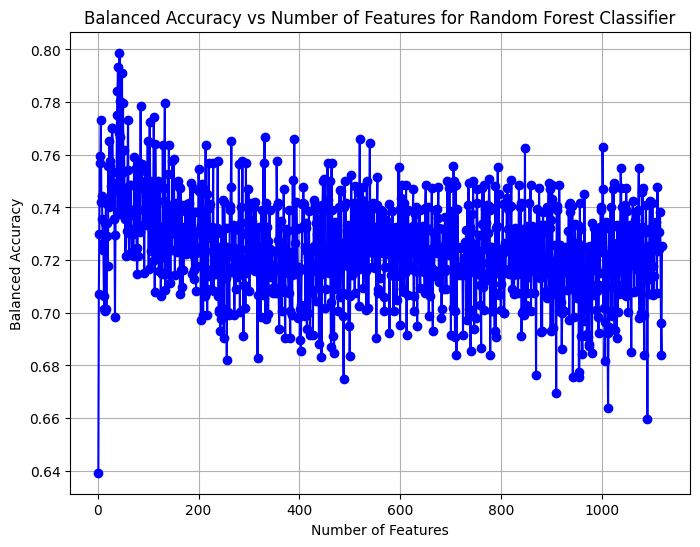

In [10]:
#%% Plot the number of features VS Balanced Accuracy

plt.figure(figsize=(8, 6))
plt.plot(num_features, balanced_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Features')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy vs Number of Features for Random Forest Classifier')
plt.grid(True)
plt.show()


In this section, we train on the balanced dataset a Random Forest classifier using the optimal number of features that maximized the balanced accuracy on the training data. We then evaluate its performance on the test data by calculating the balanced accuracy, overall accuracy, and confusion matrix.

In [11]:
# We select the the number of features that maximized the balanced accuracy on the train data
X_train_best = X_train_reduced_balanced.iloc[:, best_selected_features] 
X_test_best = X_test_reduced.iloc[:, best_selected_features]

# We fit and predict a Random forest classifier
model_best = RandomForestClassifier(random_state=42, n_estimators=20, max_features='log2', class_weight='balanced', max_depth=10) 
model_best.fit(X_train_best, y_train_reduced_balanced) 
y_pred_best = model_best.predict(X_test_best)
y_pred_best_proba = model_best.predict_proba(X_test_best)[:,1]


# Calculate the balanced accuracy, accuracy and the confusion matrix
best_bal_acc_final = balanced_accuracy_score(y_test_reduced, y_pred_best) 
conf_matrix_best = confusion_matrix(y_test_reduced, y_pred_best)
accuracy_tree = accuracy_score(y_test_reduced, y_pred_best)


# Print the results
print("\n--- Random Forest with features Selection Summary --- ")
print(f"Best Accuracy : {accuracy_tree:.4f}")
print(f"Best Balanced Accuracy: {best_bal_acc_final:.4f}")
print(f"Best Confusion Matrix:\n{conf_matrix_best}")
print(f"For the final model we have {best_k} features")


--- Random Forest with features Selection Summary --- 
Best Accuracy : 0.9187
Best Balanced Accuracy: 0.8438
Best Confusion Matrix:
[[135   9]
 [  4  12]]
For the final model we have 43 features


The Random Forest model with 43 selected features performed quite well. It achieved a high accuracy of 91.87%, meaning it correctly predicted the outcome for most cases. The balanced accuracy of 84.38% indicates it handled both classes fairly well, even if they were imbalanced.

### ***2nd Method : Lasso***

##### Functions: 
some functions are created to be used for the following models: 
- A general thresholding function that transforms lasso's predictions into class label predictions based on the specific threshold provided.
- Thresholding tuning function that finds the optimal threshold for a given alpha.

In [12]:
def thresholding(threshold, y):
    '''
    transforms the predictions based on a given threshold
    
    args :
           threshold : the threshold to transform predictions to class labels
           y: predicted probabilities 
        
    returns: 
           array of predicted class labels
    '''
    y_copy = y.copy()
    y_copy[y_copy>threshold] = 1 
    y_copy[y_copy<=threshold] = -1
    return y_copy

In [13]:
#Hethe threshold are tuned:

def lasso_alpha (alpha, kf_splits = 5, X_train = X_train, y_train=y_train, thresholds=[0]):
    '''
    this function for a given alpha, it tunes the set of thresholds using Kfolds cross validation
    

    args :
            alpha: lasso penalty that controls the regularization strength.
            kf_splits: number of folds for the cross validation
            x_train: training set
            y_train: training targets
            thresholds: threshold space to tune from, defaulted to 0.

    return: 
            average threshold from the optimal folds thresholds
    '''

    kf = KFold(kf_splits)
    
    fold_optimal = []

    #cross validationg only on the training set
    
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        x_train_cv = X_train.iloc[train_index, :]
        x_test_cv = X_train.iloc[test_index,:] #test set from the training set
        y_train_cv = y_train.iloc[train_index]
        y_test_cv = y_train.iloc[test_index]
        lasso = Lasso(alpha)
        lasso.fit(x_train_cv, y_train_cv)
        y_pred = lasso.predict(x_test_cv)
        
        #tuning the threshold for each fold -> only training set used

        fold_scores = []
        for threshold in thresholds:
            y_label = thresholding(threshold, y_pred)
            fold_scores.append(balanced_accuracy_score(y_test_cv, y_label))

        #the best threshold per fold is appended to the optimal

        fold_optimal.append(thresholds[np.argmax(fold_scores)])  

    return np.average(fold_optimal) 

- here the thresholds space and alpha space are defined, the hypertuning is performed in this space:

In [14]:
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]
alpha_space = np.arange(0.001, 0.05, 0.001)

- for each alpha we iterate through the threshold space to optain the optimal threshold (5-fold cross validation in the training set is used to tune the threshold)
- a Lasso model with the above alpha is fitted on the training set and then the obtained optimal threshold is used to transform the test set's predicted probabilities into class labels 
- the corresponding balanced accuracy and number of selected features are obtained 

In [15]:
cross_val_scores = []  # To store cross-validated scores for each alpha

# Cross-validation for alpha and threshold tuning
for alpha in alpha_space:
    # Find optimal threshold using the lasso_alpha function defined above
    optimal_threshold = lasso_alpha(alpha, X_train=X_train, y_train=y_train, thresholds=thresholds)
    
    # Perform cross-validation to estimate performance for this alpha
    kf = KFold(5)
    fold_scores = []
    fold_features = []

    for train_index, val_index in kf.split(X_train):
        x_train_cv = X_train.iloc[train_index, :]
        x_val_cv = X_train.iloc[val_index, :]
        y_train_cv = y_train.iloc[train_index]
        y_val_cv = y_train.iloc[val_index]
        
        # Fit Lasso model on the fold
        lasso = Lasso(alpha)
        lasso.fit(x_train_cv, y_train_cv)
        y_val_pred = lasso.predict(x_val_cv)
        num_selected_features = x_train_cv.values[:, lasso.coef_!=0].shape[1]

        # Apply the optimal threshold to validation predictions
        y_val_label = thresholding(optimal_threshold, y_val_pred)
        fold_scores.append(balanced_accuracy_score(y_val_cv, y_val_label))
        fold_features.append(num_selected_features)
    
    # Average cross-validation score for this alpha
    cross_val_scores.append((alpha, np.mean(fold_scores), round(np.mean(fold_features))))
    #print(f"Alpha: {alpha}, Cross-validated Score: {np.mean(fold_scores)}")

# Step 2: Select the best alpha based on cross-validation
best_alpha = max(cross_val_scores, key=lambda x: x[1])[0]
print(f"Best Alpha: {best_alpha}")

# Final evaluation on the test set
# Retrain the model on the entire training set with the best alpha
optimal_threshold = lasso_alpha(best_alpha, X_train=X_train, y_train=y_train, thresholds=thresholds)
lasso = Lasso(best_alpha)
lasso.fit(X_train, y_train)

# Prediction obtained from the test set
y_test_pred_lasso = lasso.predict(X_test)
y_test_label = thresholding(optimal_threshold, y_test_pred_lasso)
num_selected_features = X_train.values[:, lasso.coef_ != 0].shape[1]

final_score = balanced_accuracy_score(y_test, y_test_label)
print(f"Final Test Score: {final_score}, Selected Features: {num_selected_features}")


Best Alpha: 0.005
Final Test Score: 0.8506944444444444, Selected Features: 181


In [16]:
# Calculate the balanced accuracy, accuracy and the confusion matrix
best_bal_acc_final = balanced_accuracy_score(y_test, y_test_label) 
conf_matrix_best = confusion_matrix(y_test, y_test_label)
accuracy_tree = accuracy_score(y_test, y_test_label)


# Print the results
print("\n--- Lasso features Selection Summary --- ")
print(f"Best Accuracy : {accuracy_tree:.4f}")
print(f"Best Balanced Accuracy: {best_bal_acc_final:.4f}")
print(f"Best Confusion Matrix:\n{conf_matrix_best}")
print(f"For the final model we have {num_selected_features} features")


--- Lasso features Selection Summary --- 
Best Accuracy : 0.9313
Best Balanced Accuracy: 0.8507
Best Confusion Matrix:
[[137   7]
 [  4  12]]
For the final model we have 181 features


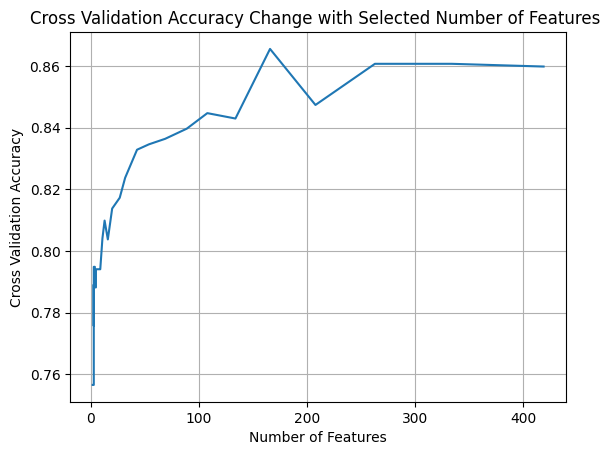

In [17]:
df = pd.DataFrame(cross_val_scores, columns=['Alpha', 'CV score', 'No. Features'])

plt.plot(df['No. Features'], df['CV score'])
plt.grid()
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation Accuracy')
plt.title("Cross Validation Accuracy Change with Selected Number of Features ")
plt.show()

### ***3rd Method: Support Vector Machine***

- for each alpha, the train and test set are subsetted based on the lasso coefficients (zero coefficients are discarded)
- an SVM model is fitted on the subset with class_weight set to balanced to account for the imbalance in the data
- the balanced accuracy and corresponding number of features is recorded for each alpha

- note: we tried threshold tuning on the predicted probabilities of the svm (using snm.predict_proba()) and we obtaind similar results as this approach, the best accuracy remains the same. 

In [18]:
# cross-validated results
cv_balanced_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation to estimate performance of each alpha
for alpha in alpha_space:
    fold_scores = [] 
    fold_features = []
    
    for train_index, val_index in kf.split(X_train):
        # Split data into train/validation for theach fold
        x_train_cv = X_train.iloc[train_index, :]
        x_val_cv = X_train.iloc[val_index, :]
        y_train_cv = y_train.iloc[train_index]
        y_val_cv = y_train.iloc[val_index]
        
        # Apply Lasso for feature selection
        lasso = Lasso(alpha)
        lasso.fit(x_train_cv, y_train_cv)
        num_selected_features = x_train_cv.values[:, lasso.coef_!=0].shape[1]
        
        # Discard features with zero coefficients
        x_train_cv_subset = x_train_cv.values[:, lasso.coef_ != 0]
        x_val_cv_subset = x_val_cv.values[:, lasso.coef_ != 0]
        

        svm = SVC(probability=True, class_weight='balanced')
        svm.fit(x_train_cv_subset, y_train_cv)
            
        y_val_pred = svm.predict(x_val_cv_subset)
        fold_scores.append(balanced_accuracy_score(y_val_cv, y_val_pred))
        fold_features.append(num_selected_features)

    # append average cross-validation score for this alpha
    cv_balanced_scores.append((alpha, np.mean(fold_scores), round(np.mean(fold_features))))
    #print(f"Alpha: {alpha}, CV Balanced Accuracy: {np.mean(fold_scores)}")

best_alpha = max(cv_balanced_scores, key=lambda x: x[1])[0]
print(f"Best Alpha: {best_alpha}")

# Final evaluation on the test set
lasso = Lasso(best_alpha)
lasso.fit(X_train, y_train)

x_train_best_subset = X_train.values[:, lasso.coef_ != 0]
x_test_best_subset = X_test.values[:, lasso.coef_ != 0]
num_selected_features = x_train_best_subset.shape[1]

svm_final = SVC(probability=True, class_weight='balanced')
svm_final.fit(x_train_best_subset, y_train)

y_test_pred = svm_final.predict(x_test_best_subset)
y_test_pred_svm = svm_final.predict_proba(x_test_best_subset)
final_test_score = balanced_accuracy_score(y_test, y_test_pred)

print(f"Final Test Score: {final_test_score}, Selected Features: {num_selected_features}")


Best Alpha: 0.013000000000000001
Final Test Score: 0.8923611111111112, Selected Features: 20


In [19]:
# Calculate the balanced accuracy, accuracy and the confusion matrix
best_bal_acc_final = balanced_accuracy_score(y_test, y_test_pred) 
conf_matrix_best = confusion_matrix(y_test, y_test_pred)
accuracy_tree = accuracy_score(y_test, y_test_pred)


# Print the results
print("\n--- SVM Summary --- ")
print(f"Best Accuracy : {accuracy_tree:.4f}")
print(f"Best Balanced Accuracy: {best_bal_acc_final:.4f}")
print(f"Best Confusion Matrix:\n{conf_matrix_best}")
print(f"For the final model we have {num_selected_features} features")


--- SVM Summary --- 
Best Accuracy : 0.9563
Best Balanced Accuracy: 0.8924
Best Confusion Matrix:
[[140   4]
 [  3  13]]
For the final model we have 20 features


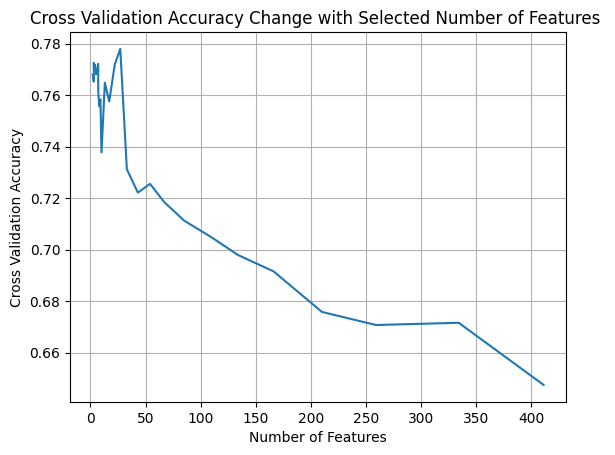

In [20]:
df = pd.DataFrame(cv_balanced_scores, columns=['Alpha', 'CV score', 'No. Features'])

plt.plot(df['No. Features'], df['CV score'])
plt.grid()
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation Accuracy')
plt.title("Cross Validation Accuracy Change with Selected Number of Features ")
plt.show()

### **Part T2.2**. : Feature selection methods not covered in the course

#### ***1st Method : Logistic Regression with Elastic net penalty***

In the first part of our code, we want to know what are the combinations for C(1/λ) and l1_ratio. The mixing parameter α (l1_ratio) ranges from 0 to 1 and  dictates the balance between L1 regularization (LASSO) and L2 regularization (RIDGE). The λ parameter serves as the penalty parameter, controlling the strength of the penalty applied to the model's coefficients- so a larger λ (small C) would results in more significant regularization with more coefficients shrinken to 0. We select this parameter with cross-validation through all combinations l1 and C and we use the reduced dataset for this task.

In [21]:
# 1st Step : Finf the best combinaison of C and l1_ratio

alpha_values_elastinet = [0.01, 0.05, 0.1]  # Grid for our C values (C=1/λ) 
l1_ration_values = [0.3,0.5,0.7] # Grid for our l1_ratio 

best_alpha_el = None # Best C
best_l1_ratio = None # Best l1_ratio
best_balanced_acc_el = 0 # Best balanced accuracy
mean_cv_score_el  ={} # Dictionnary to store the balanced accuracy for all combinaisons of C and l1_ratio


for alpha in alpha_values_elastinet:
    for l1 in l1_ration_values : 
        # We compute the logistic model
        model = LogisticRegression(penalty='elasticnet', solver='saga', C=alpha, l1_ratio = l1, max_iter=10000, tol=1e-3, random_state=42, class_weight='balanced') # we fit a logistic model for one combinaison of C and l1_ratio

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_score = cross_val_score(model, X_train_reduced, y_train_reduced,cv= cv, scoring='balanced_accuracy') # Cross-vvalidation process
        mean_cv_score_el [(alpha, l1)] = np.mean(cv_score)

        # Check if the accuracy is better tha the one before
        if mean_cv_score_el[(alpha, l1)]> best_balanced_acc_el : 
            best_alpha_el=alpha
            best_l1_ratio = l1
            best_balanced_acc_el = mean_cv_score_el[(alpha, l1)]


# Print our results 
print(f"Best C for cross validation is : {best_alpha_el}")
print(f"Best l1_ratio for balanced accuracy is : {best_l1_ratio}")
print(f"Best balanced accuracy for cross validation {best_balanced_acc_el}")


Best C for cross validation is : 0.01
Best l1_ratio for balanced accuracy is : 0.3
Best balanced accuracy for cross validation 0.7816451389689771


The optimal hyperparameters for our model are an alpha of 0.01 and an l1_ratio of 0.3, resulting in a balanced accuracy of 78.16% during cross-validation. With a lambda of 100 and an l1_ratio of 0.3, the regularization leans more towards a Ridge penalty than a Lasso penalty, but with a strong regularization.

We will plot the balanced accuracy with the different combinations of alpha and l1.

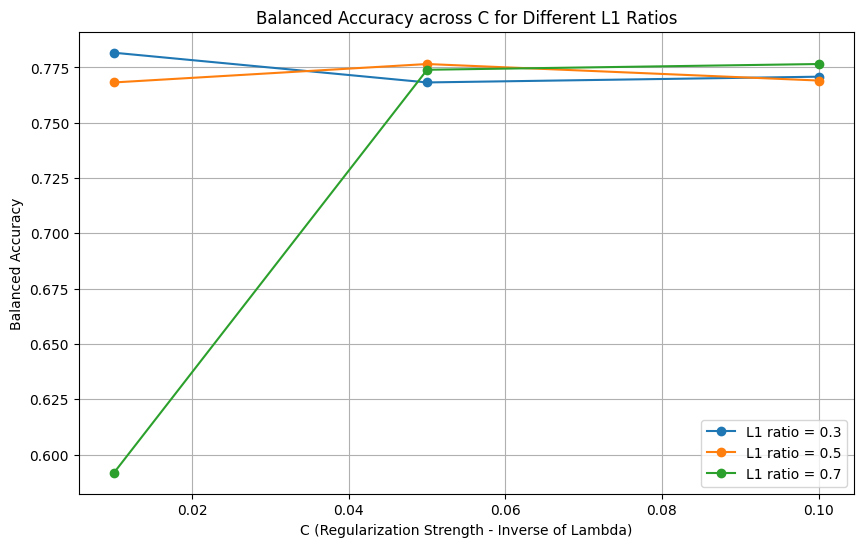

In [22]:
# Plot the differents values of C and l1_ratio against the Balanced Accuracy

# dictionary to dataFrame for the plot
mean_cv_df = pd.DataFrame([(alpha, l1, acc) for (alpha, l1), acc in mean_cv_score_el.items()],
                          columns=['alpha', 'l1_ratio', 'balanced_accuracy'])


plt.figure(figsize=(10, 6))
# Loop through L1 ratios to plot separate lines for each of them 
for l1_ratio in mean_cv_df['l1_ratio'].unique():
    subset = mean_cv_df[mean_cv_df['l1_ratio'] == l1_ratio]
    plt.plot(subset['alpha'], subset['balanced_accuracy'], label=f'L1 ratio = {l1_ratio:.1f}',marker='o')

plt.xlabel('C (Regularization Strength - Inverse of Lambda)')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy across C for Different L1 Ratios')
plt.legend()
plt.grid()  
plt.show()


To finalize our model, we will fit it on the balanced training data and use it to make predictions on the test data.

In [23]:
# We fit and predict the Logistic Classifier with the elastic net penalty with the ideal parameter l1_ratio and C
model_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', C=best_alpha_el, l1_ratio = best_l1_ratio, max_iter=10000, tol = 1e-3, random_state=42, class_weight='balanced')
model_elasticnet.fit(X_train_reduced_balanced, y_train_reduced_balanced)
y_pred_el = model_elasticnet.predict(X_test_reduced)
y_pred_el_proba = model_elasticnet.predict_proba(X_test_reduced)[:,1]


# Calculate the balanced accuracy, accuracy and the confusion matrix
accuracy_el_final = accuracy_score(y_test, y_pred_el)
balanced_accuracy_el_final = balanced_accuracy_score(y_test, y_pred_el)
conf_matrix_el=confusion_matrix(y_test, y_pred_el)
selected_features_el = np.where(model_elasticnet.coef_!=0)[1]

# Print the results
print("\n--- Logistic Regression with ElasticNet Penalty Summary ---")
print(f"Accuracy: {accuracy_el_final:.4f}")
print(f"Balanced Accuracy : {balanced_accuracy_el_final:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_el}")
print(f"Number of selected features: {len(selected_features_el)}")


--- Logistic Regression with ElasticNet Penalty Summary ---
Accuracy: 0.9500
Balanced Accuracy : 0.8333
Confusion Matrix:
[[141   3]
 [  5  11]]
Number of selected features: 29


The Logistic Regression model with an ElasticNet penalty achieved an accuracy of 95.00% and a balanced accuracy of 83.33%, using 29 selected features. The confusion matrix indicates strong performance, with only a few misclassifications. The model demonstrates high accuracy and balanced accuracy, indicating it performs well on both classes despite potential class imbalance. With only 29 features selected, it effectively balances simplicity and predictive performance, suggesting a well realized feature selection process.

#### ***2nd Method : Nearest Schrunken Centroids method***

First, we need to determine the optimal value for the delta parameter, which controls the degree of regularization in the NSC method. To achieve this, we use cross-validation to evaluate the model's performance across a grid of delta values. So, we have created a function that takes X_train, y_train, and a range of delta values between 0 and 1 as input. For each delta value, the function train the model and evaluat its balanced accuracy using cross-validation. The delta value that result in the highest balanced accuracy is selected as the optimal parameter.

In [24]:

def cross_validate_nsc_features(X_train, y_train, shrinkage_range):
    cv_scores = {}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    best_balanced_acc_nsc = 0
    best_shrink = None
    model = None

    for shrinkage_value in shrinkage_range:
        model = NearestCentroid(metric='euclidean', shrink_threshold=shrinkage_value)
        
        #cross validation process
        cv_score_nsc = cross_val_score(model, X_train, y_train, cv=cv, scoring='balanced_accuracy')
        cv_scores[shrinkage_value] = np.mean(cv_score_nsc)

        if cv_scores[shrinkage_value] > best_balanced_acc_nsc:
            best_shrink = shrinkage_value
            best_balanced_acc_nsc = cv_scores[shrinkage_value]
            best_model = model
        
    #Transform the data for the plot
    cv_scores_values = [cv_scores[shrinkage_value] for shrinkage_value in shrinkage_range]

    # Plot delta values
    plt.figure(figsize=(8, 6))
    plt.plot(shrinkage_range, cv_scores_values, color='r', label='Cross Validation Results VS alpha')
    plt.xlabel('Shrinkage Values')
    plt.ylabel('Cross Validation Accuracy')
    plt.title('Cross Validation Accuracy vs Shrinkage Parameter')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return  best_shrink

After determining the best shrinkage parameter, we want to refine the feature selection process.  The threshold refers to the feature importance percentile used to select the most relevant features based on their contribution to the two classes. 
The NSC model is trained using the optimal delta value and the feature importance is determined by calculating the absolute difference between the class-specific means and the overall mean. If the difference (distance) is high, it indicates that the feature has a significant difference between its class-specific mean and the overall mean. These features are considered important because they play a role in distinguishing the classes. If the distance is small, it indicates that it contributes little to differentiating between classes. We chose three thresholds 99.25, 99.5, and 99.75 because these values allow us to focus on the top 0.75%, 0.5%, and 0.25% of features, ensuring we select only the most impactful ones.


In [25]:

def select_features_with_optimal_threshold_cv(X_train, y_train, shrinkage_value):
    # Initialize cross-validation setup
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    performance = []
    cv_scores = {}
    best_balanced_acc_nsc = 0
    best_threshold = None
    best_num_features = None
    best_model = None
    best_selected_features_mask = None

    thresholds = [ 99.25, 99.5, 99.75]

    for t in thresholds:
        # start the model
        model = NearestCentroid(metric='euclidean', shrink_threshold=shrinkage_value)

        #cross-validation with feature selection for the current threshold from the loop
        threshold_performance = []
        for train_idx, val_idx in cv.split(X_train, y_train):

            # split the data into fold (train data) and validation data (test data)
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # Train NSC model on the train data
            model.fit(X_train_fold, y_train_fold)

            # calculate teh distances between the centroids and the overall mean
            class_means = np.array(model.centroids_)
            overall_mean = np.mean(X_train_fold.to_numpy(), axis=0)
            feature_importance = np.abs(class_means - overall_mean).mean(axis=0)

            # Apply the threshold to most select features
            threshold_value = np.percentile(feature_importance, t)
            selected_features = feature_importance > threshold_value

            # Reduce the data
            selected_indices = np.where(selected_features)[0]
            X_train_fold_reduced = X_train_fold.iloc[:, selected_indices]
            X_val_fold_reduced = X_val_fold.iloc[:, selected_indices]

            # Fit the model on the reduce dataset
            model.fit(X_train_fold_reduced, y_train_fold)
            y_pred = model.predict(X_val_fold_reduced)

            # Evaluate performance
            balanced_acc = balanced_accuracy_score(y_val_fold, y_pred)
            threshold_performance.append(balanced_acc)

        # Validation
        avg_balanced_acc = np.mean(threshold_performance)
        performance.append((t, len(selected_indices), avg_balanced_acc))
        cv_scores[t] = avg_balanced_acc

        if avg_balanced_acc > best_balanced_acc_nsc:
            best_balanced_acc_nsc = avg_balanced_acc
            best_threshold = t
            best_num_features = len(selected_indices)
            best_model = model
            best_selected_features_mask = selected_features

    performance_df = pd.DataFrame(performance, columns=['Threshold', 'Num_Features', 'Balanced_Accuracy'])

    # Plot Thresholds
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.set_xlabel('Threshold Percentile')
    ax1.set_ylabel('Number of Features', color='blue')
    ax1.plot(performance_df['Threshold'], performance_df['Num_Features'], label='Number of Features', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Balanced Accuracy', color='red')
    ax2.plot(performance_df['Threshold'], performance_df['Balanced_Accuracy'], label='Balanced Accuracy', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title('Threshold Impact on Model Performance')
    fig.tight_layout()
    plt.grid()
    plt.show()

    return best_threshold, best_num_features, best_selected_features_mask, performance_df, best_model


The next part calls both of the function that we created and it reduces the original dataset.

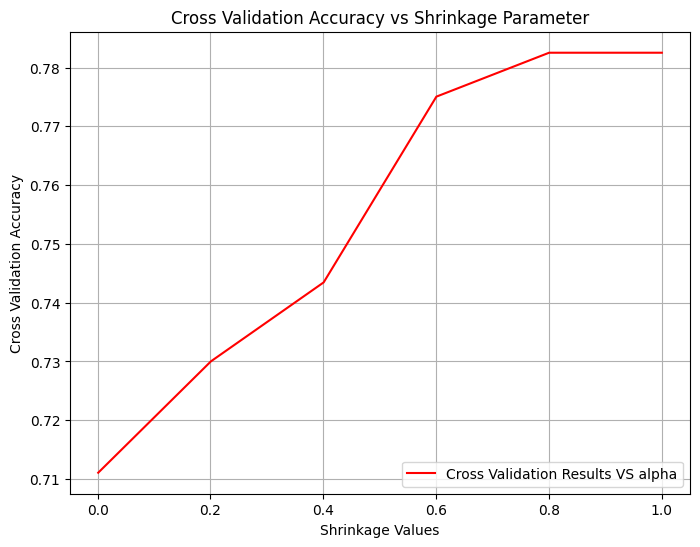

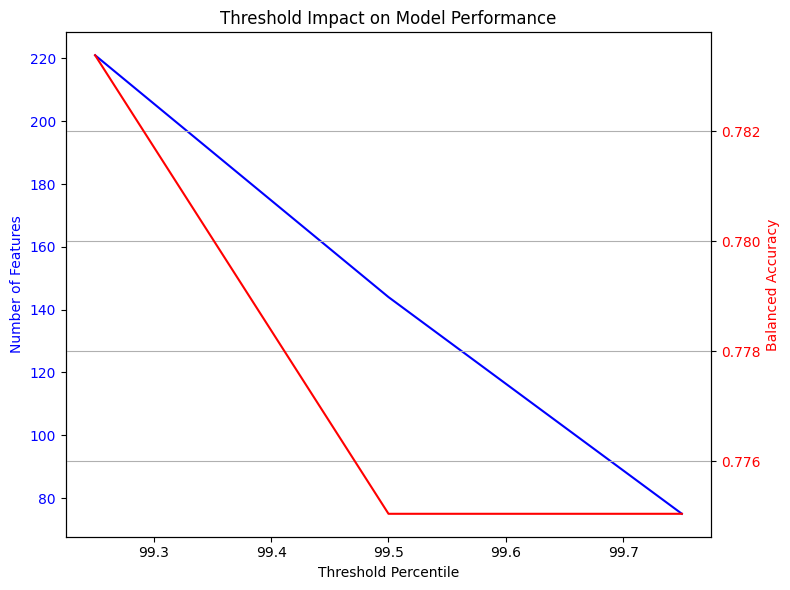

Best Threshold: 99.25
Number of Selected Features: 221
Best Shrinkage Parameter (Alpha): 0.8002


In [26]:
# Selection of a range of delta - shrinkage parameter
shrinkage_range = np.linspace(0.001, 1, 6)

# Perform cross-validation to find the best shrinkage parameter
best_shrink = cross_validate_nsc_features(X_train_reduced, y_train_reduced, shrinkage_range)

# Perform feature selection
best_threshold, best_num_features, best_selected_features_mask, performance_df, best_model = select_features_with_optimal_threshold_cv(X_train_reduced, y_train_reduced, best_shrink)

# we reduce the dataset 
selected_feature_indices = np.where(best_selected_features_mask)[0]
X_train_reduced_nsc = X_train_reduced.iloc[:, selected_feature_indices]
X_test_reduced_nsc = X_test_reduced.iloc[:, selected_feature_indices]

# Print the result
print(f"Best Threshold: {best_threshold}")
print(f"Number of Selected Features: {len(selected_feature_indices)}")
print(f"Best Shrinkage Parameter (Alpha): {best_shrink}")

With the Nearest Shrunken Centroid method, the optimal feature selection was achieved with a threshold of 99.25, reducing the dataset to 221 features. The best shrinkage parameter (delta) was determined to be 0.8002, ensuring a balance between model simplicity and predictive performance.

After we will just try our model with our test data.

In [28]:
# fit the model
final_model = NearestCentroid(metric='euclidean', shrink_threshold=best_shrink)
final_model.fit(X_train_reduced_nsc, y_train_reduced)

# Predict
y_pred_reduced = final_model.predict(X_test_reduced_nsc)



# Evaluate performance
accuracy_final = accuracy_score(y_test_reduced, y_pred_reduced)
balanced_accuracy_final = balanced_accuracy_score(y_test_reduced, y_pred_reduced)
conf_matrix_final = confusion_matrix(y_test_reduced, y_pred_reduced)

# Print the results
print("\n --- Nearest Shrunken Centroids ---")
print(f"Accuracy: {accuracy_final:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_final:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_final}")
print(f"Number of Selected Features: {len(selected_feature_indices)}")



 --- Nearest Shrunken Centroids ---
Accuracy: 0.9625
Balanced Accuracy: 0.8681
Confusion Matrix:
[[142   2]
 [  4  12]]
Number of Selected Features: 221


The Nearest Shrunken Centroids model demonstrated strong performance with an accuracy of 96.25% and a balanced accuracy of 86.81%, handling nicely class imbalances. With 221 selected features, the model show a balance between dimensionality reduction and predictive capability. 

#### ***3rd Method: ANOVA F-test***

- because this method has an internal step of deviding by the variance, we first get rid of all the features that have zero variances
- ANOVA or Analysis of Variance: ranks the variances based on their importance, then the method returns k features.
- we iterate over the 500 feature space, subset the train and test set based on the selected features.
- an svm model is trained on the subset of the train test, a cross validation is performered on the train test to obtain the best k.
- Finally, the balanced accuracy is obtained from the test set.

In [29]:
selector = VarianceThreshold(threshold=0)
X_train_removed_0_var = selector.fit_transform(X_train)
X_test_removed_0_var = selector.transform(X_test)

In [30]:
scores = []
for i in range(1, 500, 5):
    # Baseline method:
    model = SelectKBest(k=i)
    X_train_kbest = model.fit_transform(X_train_removed_0_var, y_train)
    
    # Use cross-validation on the training set
    svc = SVC(class_weight='balanced')
    cv_scores = cross_val_score(svc, X_train_kbest, y_train, scoring='balanced_accuracy', cv=5)
    
    scores.append((cv_scores.mean(), i))
    #print((cv_scores.mean(), i))

# After finding the best number of features, re-train the model on the full training set and evaluate on the test set
best_k = max(scores, key=lambda x: x[0])[1]
final_model = SelectKBest(k=best_k)
X_train_best = final_model.fit_transform(X_train_removed_0_var, y_train)
X_test_best = final_model.transform(X_test_removed_0_var)

svc_final = SVC(class_weight='balanced', probability=True)
svc_final.fit(X_train_best, y_train)
y_pred = svc_final.predict(X_test_best)
y_pred_anova = svc_final.predict_proba(X_test_best)

final_score = balanced_accuracy_score(y_test, y_pred)
print(f"Best k: {best_k}, Final Test Score: {final_score}")


Best k: 291, Final Test Score: 0.9375


In [31]:
# Calculate the balanced accuracy, accuracy and the confusion matrix
best_bal_acc_final = balanced_accuracy_score(y_test, y_pred) 
conf_matrix_best = confusion_matrix(y_test, y_pred)
accuracy_tree = accuracy_score(y_test, y_pred)


# Print the results
print("\n--- ANOVA Summary --- ")
print(f"Best Accuracy : {accuracy_tree:.4f}")
print(f"Best Balanced Accuracy: {best_bal_acc_final:.4f}")
print(f"Best Confusion Matrix:\n{conf_matrix_best}")
print(f"For the final model we have {best_k} features")


--- ANOVA Summary --- 
Best Accuracy : 0.9375
Best Balanced Accuracy: 0.9375
Best Confusion Matrix:
[[135   9]
 [  1  15]]
For the final model we have 291 features


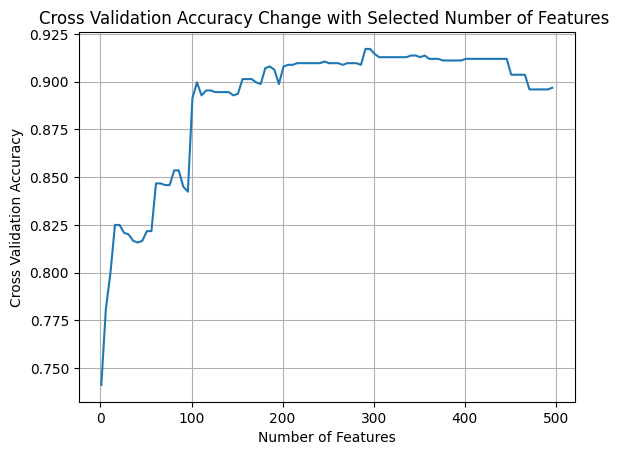

In [32]:
df = pd.DataFrame(scores, columns=['CV score', 'No. Features'])

plt.plot(df['No. Features'], df['CV score'])
plt.grid()
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation Accuracy')
plt.title("Cross Validation Accuracy Change with Selected Number of Features ")
plt.show()

## **Comparaison for all the methods**

### ***ROC Curve for all our methods***

We are going to plot the ROC curves for all the models used to compare their performance visually. Additionally, we will include the AUC values in the legend for each model to quantify their predictive performance.

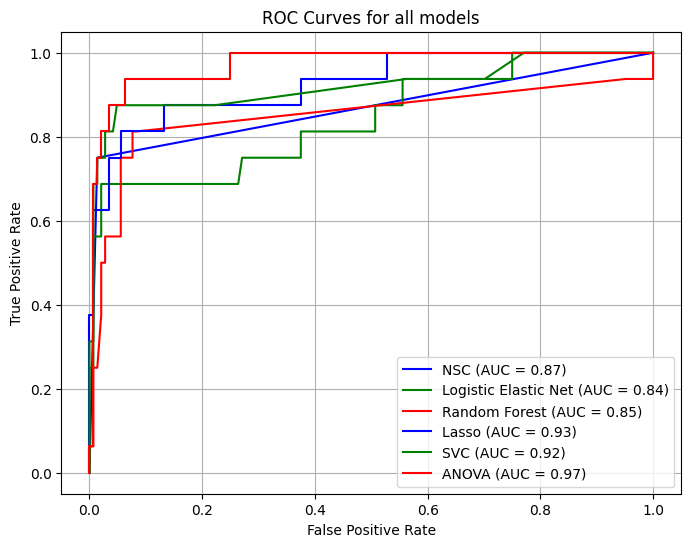

In [33]:
# dictionnary of the models
models = {
    "NSC": {"y_test": y_test_reduced, "y_pred": y_pred_reduced, "color": "b"},
    "Logistic Elastic Net": {"y_test": y_test_reduced, "y_pred": y_pred_el_proba, "color": "g"},
    "Random Forest": {"y_test": y_test_reduced, "y_pred": y_pred_best_proba, "color": "r"},
    "Lasso":{"y_test": y_test ,"y_pred": y_test_pred_lasso , "color": "b"},
    "SVC":{"y_test": y_test,"y_pred": [item[1] for item in y_test_pred_svm], "color": "g"},
    "ANOVA": {"y_test": y_test ,"y_pred": [item[1] for item in y_pred_anova], "color": "r"}
}

# add the ROC Curve for each mdoel on the graph
plt.figure(figsize=(8, 6))
for model_name, model_info in models.items():
    fpr, tpr, _ = roc_curve(model_info["y_test"], model_info["y_pred"])
    auc = roc_auc_score(model_info["y_test"], model_info["y_pred"])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', color=model_info["color"])

# Plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In general, the ROC curves demonstrate that all models perform well, with AUC values above 0.80, indicating good classification ability. However, the NSC model has the highest AUC, suggesting it offers a better overall performance in terms of the trade-off between true positive and false positive rates.

### ***Precision-Recall Curve for all models***

The PR Curve visualizes the trade-off between precision and recall at different thresholds. It is used in classification tasks, especially for imbalanced datasets. The PR curve focuses on the classifier's ability to identify positive instances effectively. The Area Under the Precision-Recall Curve (AUC-PR) summarizes the performance of the classifier across all thresholds, with higher values indicating better performance and a better balance between precision and recall. PR curves are more appropriate than ROC curves for highly skewed datasets.

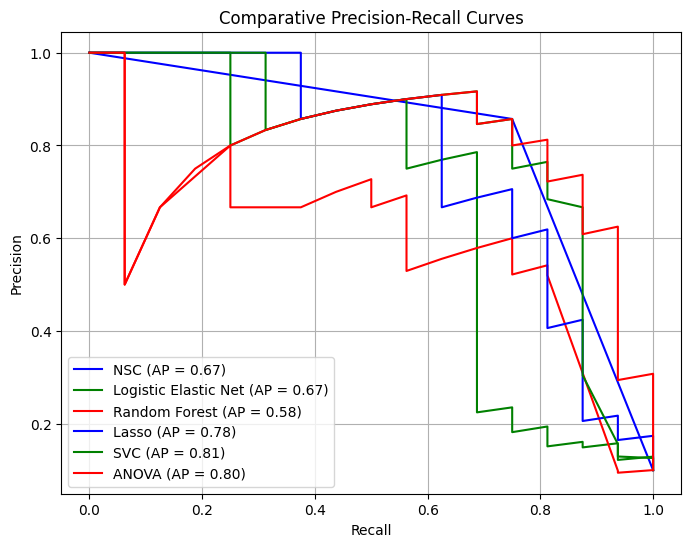

In [34]:
# add the PR Curve for each mdoel on the graph

plt.figure(figsize=(8, 6))
for model_name, model_info in models.items():
    precision, recall, _ = precision_recall_curve(model_info["y_test"], model_info["y_pred"])
    average_precision = average_precision_score(model_info["y_test"], model_info["y_pred"])
    plt.plot(recall, precision, label=f'{model_name} (AP = {average_precision:.2f})', color=model_info["color"])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparative Precision-Recall Curves')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

The Nearest Shrunken Centroids (NSC) model outperforms the others, it maintains a better balance of precision and recall across thresholds, while the Random Forest model shows the weakest performance. This graph shows the NSC model as the most reliable for identifying true positives without compromising too much on false positives.

### ***Table of comparison for all models***

In this part we will compare all the models through their : 
 - accuracy : the proportion of correctly predicted instances out of all predictions.
 - balanced accuracy: adjusted accuracy for imbalanced datasets, giving equal weight to both classes.
 - AUC - ROC :  measured the model's capacity to distinguish between classes.
 - AUC - PR : measured the performance for the minority class.
 - number of features : the number of features used by each model for prediction.
 - computationla time : time required to train and test each model.

In [37]:
# Create Table
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Balanced Accuracy", "AUC ROC","AUC-PR (AP)","Number of features"," Computational time"]
table.add_row(["NSC", 0.96, 0.87, 0.87, 0.67, 221, "1min 5s"])
table.add_row(["Logistic Elastic Net", 0.95, 0.83, 0.84, 0.67, 29, "15min 40s"])
table.add_row(["Random Forest", 0.92, 0.84,0.85, 0.58, 43, "3min 55s"])
table.add_row(["Lasso",0.9313, 0.85, 0.93, 0.78, 181, '20min 0.44s'])
table.add_row(["SVM",0.9563, 0.8924, 0.92, 0.81 ,20, '5min 26.2s' ])
table.add_row(["ANOVA", 0.9375, 0.9375, 0.97, 0.80, 291, '2min 2.9s'])

print(table)

+----------------------+----------+-------------------+---------+-------------+--------------------+---------------------+
|        Model         | Accuracy | Balanced Accuracy | AUC ROC | AUC-PR (AP) | Number of features |  Computational time |
+----------------------+----------+-------------------+---------+-------------+--------------------+---------------------+
|         NSC          |   0.96   |        0.87       |   0.87  |     0.67    |        221         |       1min 5s       |
| Logistic Elastic Net |   0.95   |        0.83       |   0.84  |     0.67    |         29         |      15min 40s      |
|    Random Forest     |   0.92   |        0.84       |   0.85  |     0.58    |         43         |       3min 55s      |
|        Lasso         |  0.9313  |        0.85       |   0.93  |     0.78    |        181         |     20min 0.44s     |
|         SVM          |  0.9563  |       0.8924      |   0.92  |     0.81    |         20         |      5min 26.2s     |
|        ANOVA  

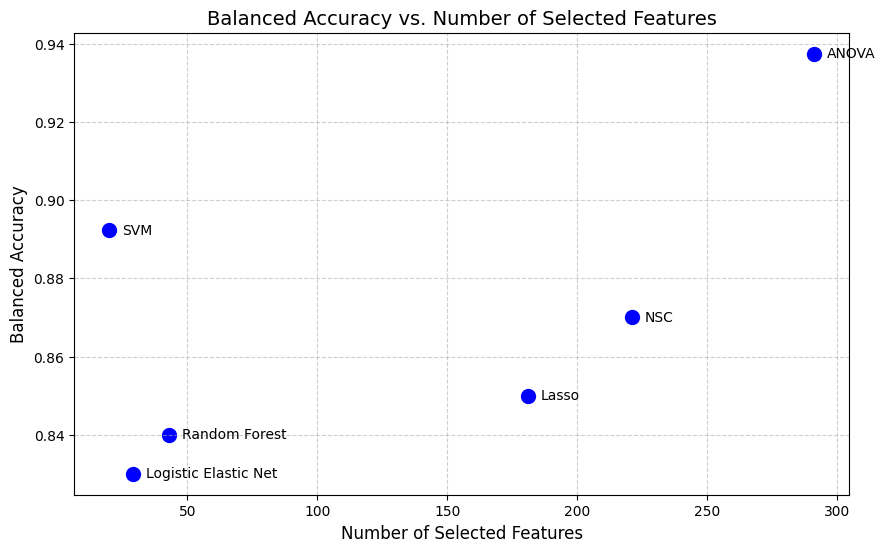

In [36]:
models = ['NSC', 'Logistic Elastic Net', 'Random Forest', 'Lasso', 'SVM', 'ANOVA']
balanced_accuracy = [0.87, 0.83, 0.84, 0.85, 0.8924, 0.9375]
number_of_features = [221, 29, 43, 181, 20, 291]


plt.figure(figsize=(10, 6))
plt.scatter(number_of_features, balanced_accuracy, color='blue', s=100)

# Annotate each point with model names
for i, model in enumerate(models):
    plt.text(number_of_features[i] + 5, balanced_accuracy[i], model, fontsize=10, ha='left', va='center')


plt.title('Balanced Accuracy vs. Number of Selected Features', fontsize=14)
plt.xlabel('Number of Selected Features', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
